# Analyzing the Relationship Between Reading Habits and Income
### *By Daniel Jimenez*

## Introduction
Warren Buffet. Bill Gates. Mark Zuckerberg. These are some of the richest and most successful people in the world. What connects them is not just their large net worth and fame, but in the fact that all of them are avid readers. Warren Buffet says he reads up to five or 6 hours a day, Bill Gates reads 50 books in a year, and every two weeks, Mark Zuckerberg will read at least one book ([Simmons, 2021](https://medium.com/accelerated-intelligence/bill-gates-warren-buffett-and-oprah-all-use-the-5-hour-rule-308f528b6363#:~:text=Warren%20Buffett%20spends%20five%20to,one%20book%20every%20two%20weeks)). They are not alone, as many others of the world’s most wealthy and successful people have shared their habit of reading. Of course, reading alone will not make someone a billionaire. However, based on this common factor among the world’s wealthiest, one does have to wonder: *Do people who read end up making more money?* This is the question I try to answer in this analysis.

## Hypothesis
I hypothesize that people who read more books earn more than those who read less. However, I do not believe there is a direct correlation, as there are likely more factors that need to be considered. This report looks at how reading habits may be linked to income and find the factors that play a role in this relationship to determine if and how reading is linked to income. Along with answering the question stated from the previous section, it will also attempt to answer the following:

*Is the amount a person reads really an indicator of how much they earn? Is there another factor that more accurately correlates to income than reading?*

## Data Cleaning
This dataset was retrieved from [Kaggle](https://www.kaggle.com/datasets/vipulgote4/reading-habit-dataset?datasetId=856212&sortBy=dateRun&tab=bookmarked![image.png](attachment:image.png)). It contains results from a survey conducted to record the reading habits of the participants, along with some additional information about them. 

In this analysis, only the participant's **`age`**, **`education level`**, **`employment status`**, **`income`**, and the **`number of books read in the past 12 months`** will be used.

In [1]:
r<-read.csv("readinghabits.csv")
head(r)

,Age,Sex,Race,Marital.status.,Education,Employement,Incomes,How.many.books.did.you.read.during.last.12months.,Read.any.printed.books.during.last.12months.,Read.any.audiobooks.during.last.12months.,Read.any.e.books.during.last.12months.,Last.book.you.read..you.,Do.you.happen.to.read.any.daily.news.or.newspapers.,Do.you.happen.to.read.any.magazines.or.journals.
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
2,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
3,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
4,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
5,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
6,55,Female,Asian or Pacific Islander,Divorced,"Some college, no 4-year degree",Have own business/self-employed,"$40,000 to under $50,000",97,Yes,Yes,Yes,Purchased the book,No,No


In [2]:
# rename column
names(r)[names(r)=="How.many.books.did.you.read.during.last.12months."]<- "NumBooksRead"

# fixed spelling of column name to avoid errors
names(r)[names(r)=="Employement"] <- "Employment" 

In [3]:
# remove irrelevant columns
r<-subset(r, select=c("Age","Education","Employment","Incomes","NumBooksRead" ))
head(r)

,Age,Education,Employment,Incomes,NumBooksRead
,<int>,<chr>,<chr>,<chr>,<int>
1,66,College graduate,Retired,"$20,000 to under $30,000",97
2,46,High school graduate,Employed full-time,"Less than $10,000",97
3,32,High school graduate,Employed full-time,"Less than $10,000",97
4,27,High school graduate,Employed full-time,"$40,000 to under $50,000",97
5,16,High school incomplete,Employed part-time,"$10,000 to under $20,000",97
6,55,"Some college, no 4-year degree",Have own business/self-employed,"$40,000 to under $50,000",97



The original formatting of the **`Incomes`** column's values were hard to read and had a typo. The way the values were originally formatted also made it difficult to sort, so each **`Incomes`** interval was relabeled into something cleaner and more consise, making it easier to be sorted later in the analysis. The first 3 **`Incomes`** intervals were grouped together as "***Under 30k***", making it the lowest **`Incomes`** value in the dataset. This is due to the filtering performed in the next step that left those three values each with few participants. The same was done to the next two groups, grouping them together as "***30k-50k***". Grouping them together as one **`Incomes`** value increases their number of participants to around what the other values have, as we will see.

In [4]:
# fix labels of income groups to allow for sorting
r$Incomes[r$Incomes=="Less than $10,000"] <- "Under 30k"
r$Incomes[r$Incomes=="$10,000 to under $20,000"] <- "Under 30k"
r$Incomes[r$Incomes=="$20,000 to under $30,000"] <- "Under 30k"
r$Incomes[r$Incomes=="$30,000 to under $40,000"] <- "30k-50k"
r$Incomes[r$Incomes=="$40,000 to under $50,000"] <- "30k-50k"
r$Incomes[r$Incomes=="$50,000 to under $75,000"] <- "50k-75k"
r$Incomes[r$Incomes=="$75,000 to under $100,000"] <- "75k-100k"
r$Incomes[r$Incomes=="$100,000 to under $150,000"] <- "100k-150k"
r$Incomes[r$Incomes=="9$100,000 to under $150,000"] <- "100k-150k" # fix typo from income column

<br>
The minimum age for this dataset became 30 years old, as opposed to 16 years old from the original dataset. Those ages 16-20 were also removed from the analysis because most of them are still in high school and therefore responded as "High school incomplete" for their education level. The desired particpants with an "incomplete high school" are those who never finished, not those who are still currently enrolled. As you can see in the following histogram, including ages younger than 20 could significantly skew the results.

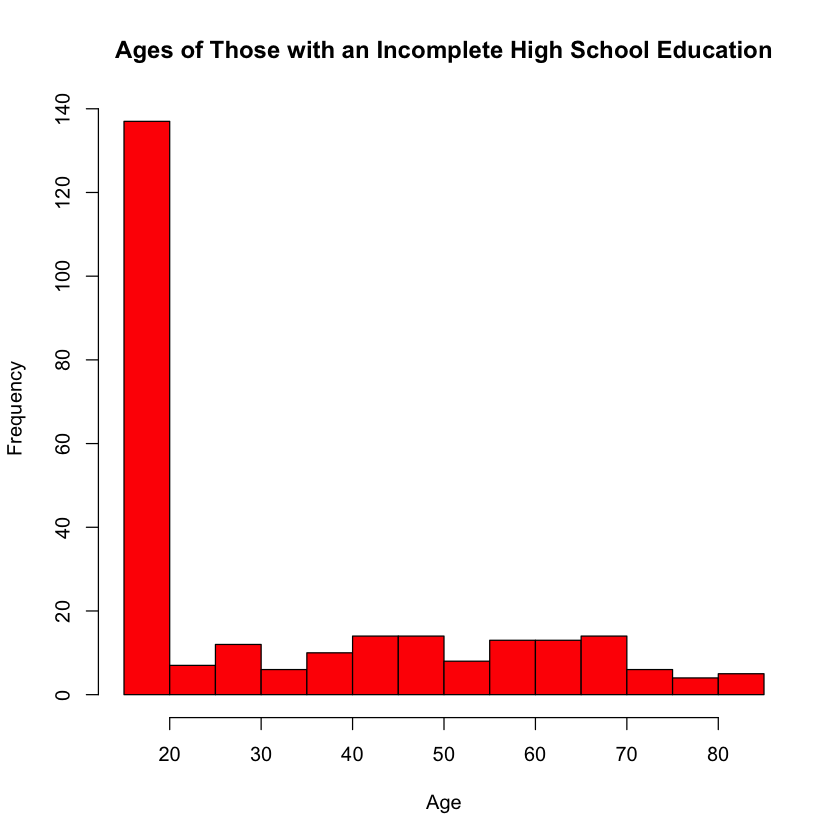

In [5]:
hist(r$Age[r$Education=="High school incomplete"], 
     main="Ages of Those with an Incomplete High School Education", 
     xlab="Age", col='red')

The data is filtered to only include those that are 30 years old or older, as it removes recently graduated students who are beginning their careers, where they may be paid lower wages due to lack of experience. Setting the minimum age at 30 creates a better starting point so that particpants who completed higher levels of education and entered the work force late had a chance of gaining experience and working out of the entry level pay. The maximum number of books read in this dataset will be 30, as any number above this were considered outliers.

Those who refused to share their income, listed their employment as "***Student***", or claimed to not know or not have an education were also excluded from the final dataset, as there was no suitable income or education data that could be analyzed. This analysis will focus on those who are out of school and currently working at least part-time in order to analyze the relationship between a participant's reading habits and their success. Those who answered "***Disabled***" for their employment were also excluded, as their income may have been greatly affected due to their disability (e.g. sustaining a serious injury that prevents them from working) and could potentially skew the data.

In [6]:
# filters
r<-subset(r,r$Age>=30)
r<-subset(r,r$NumBooksRead <=30)
r<-subset(r,r$Incomes!="Refused")
r<-subset(r,r$Employment!="Student" 
          & r$Employment!="Disabled" 
          & r$Employment!="Not employed for pay" 
          & r$Employment!="Other" 
          & r$Employment!="Retired")
r<-subset(r,Education !="Don’t know" & Education != "None")
head(r)

,Age,Education,Employment,Incomes,NumBooksRead
,<int>,<chr>,<chr>,<chr>,<int>
416,55,"Some college, no 4-year degree",Employed full-time,50k-75k,30
418,49,"Some college, no 4-year degree",Employed full-time,100k-150k,30
419,36,Post-graduate training/professional school after college,Employed full-time,75k-100k,30
424,54,"Some college, no 4-year degree",Employed full-time,100k-150k,30
427,35,College graduate,Employed full-time,Under 30k,30
429,57,High school graduate,Employed full-time,Under 30k,30


Below is the distribution of participants in each **`Incomes`** category. Combining the lowest 3 income ranges into the "***Under 30k***" and the next 2 income ranges as "***30k-50k***" category somewhat evened out the distribution better than keeping the ranges separate.

In [7]:
plyr::count(r$Incomes)

x,freq
<chr>,<int>
100k-150k,334
30k-50k,187
50k-75k,163
75k-100k,184
Under 30k,112


### Final dataset
**`Age`** and **`Employment`** are no longer needed in the dataset after filtering. A dataframe containing **`Incomes`**, **`NumBooksRead`**, and **`Education`** is created as the final dataset to be used for the analysis.

In [8]:
# create final dataset
df<-data.frame(r$Incomes,r$NumBooksRead,r$Education)
names(df)[names(df)=="r.Incomes"]<-"Incomes"
names(df)[names(df)=="r.NumBooksRead"]<-"NumBooksRead"
names(df)[names(df)=="r.Education"]<-"Education"
head(df)

,Incomes,NumBooksRead,Education
,<chr>,<int>,<chr>
1,50k-75k,30,"Some college, no 4-year degree"
2,100k-150k,30,"Some college, no 4-year degree"
3,75k-100k,30,Post-graduate training/professional school after college
4,100k-150k,30,"Some college, no 4-year degree"
5,Under 30k,30,College graduate
6,Under 30k,30,High school graduate


## Data Analysis

### Median Number of Books Read by Income Group
Because the distribution of the number of books read for each income group is skewed to the left, as you can see below, the number of books read by each group will be measured by ***median*** instead of by average.

In [9]:
# sort income groups by ascending order 
incomes<-unique(df$Incomes)[order(as.numeric(lapply(strsplit(unique(df$Incomes),"[^0-9]+"),'[[',1)),na.last=FALSE)]
incomes

[1] "Under 30k" "30k-50k"   "50k-75k"   "75k-100k"  "100k-150k"

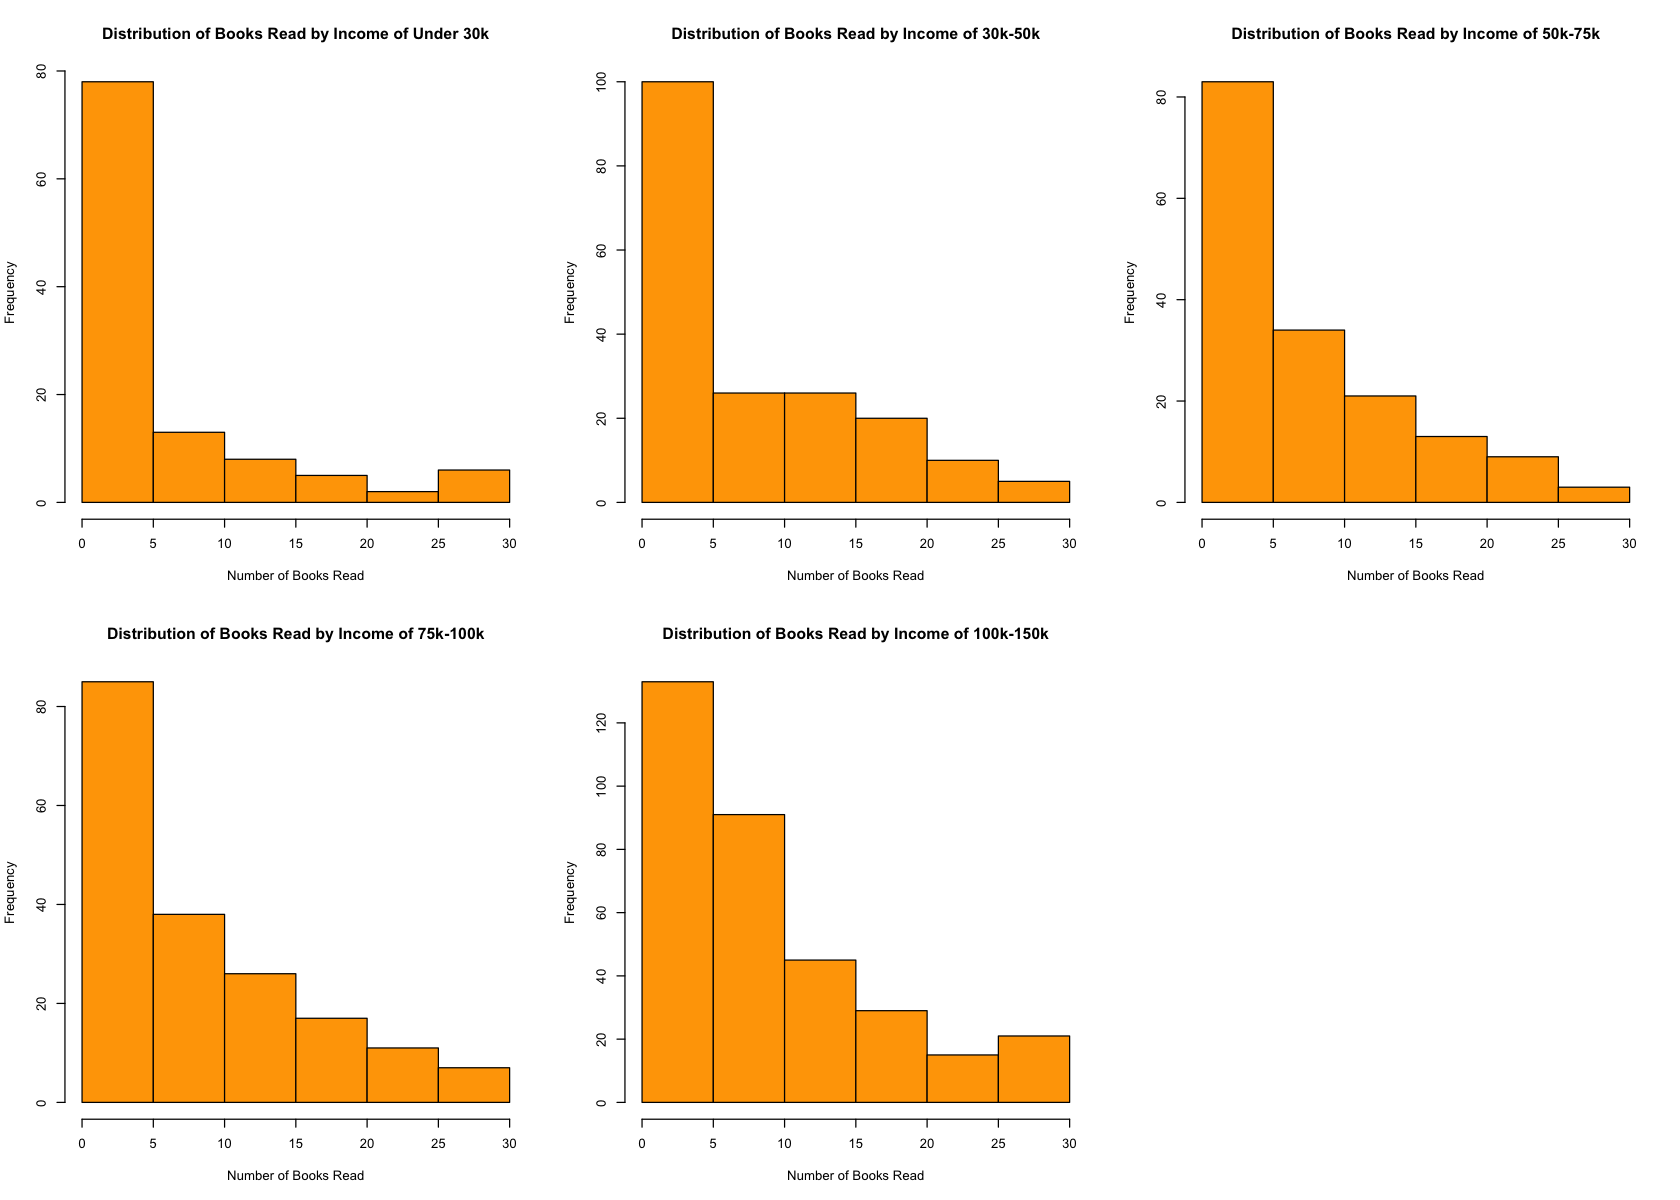

In [10]:
options(repr.plot.width=14, repr.plot.height=10)
par(mfrow = c(2, 3))
# show left-skewed distributions of books read by income level
invisible(sapply(incomes, function(x) hist(df$NumBooksRead[df$Incomes==x], 
                                 main=paste("Distribution of Books Read by Income of", x), 
                                 xlab="Number of Books Read", col="orange")))

In [11]:
# get median number of books read per income group
medBooks<-sapply(incomes, function(x) median(df$NumBooksRead[df$Incomes==x]))
medBooks

Under 30k   30k-50k   50k-75k  75k-100k 100k-150k 
        3         5         5         6         7

In [12]:
incomeByBooks<-data.frame(incomes,medBooks)
rownames(incomeByBooks) <- NULL
incomeByBooks

incomes,medBooks
<chr>,<dbl>
Under 30k,3
30k-50k,5
50k-75k,5
75k-100k,6
100k-150k,7


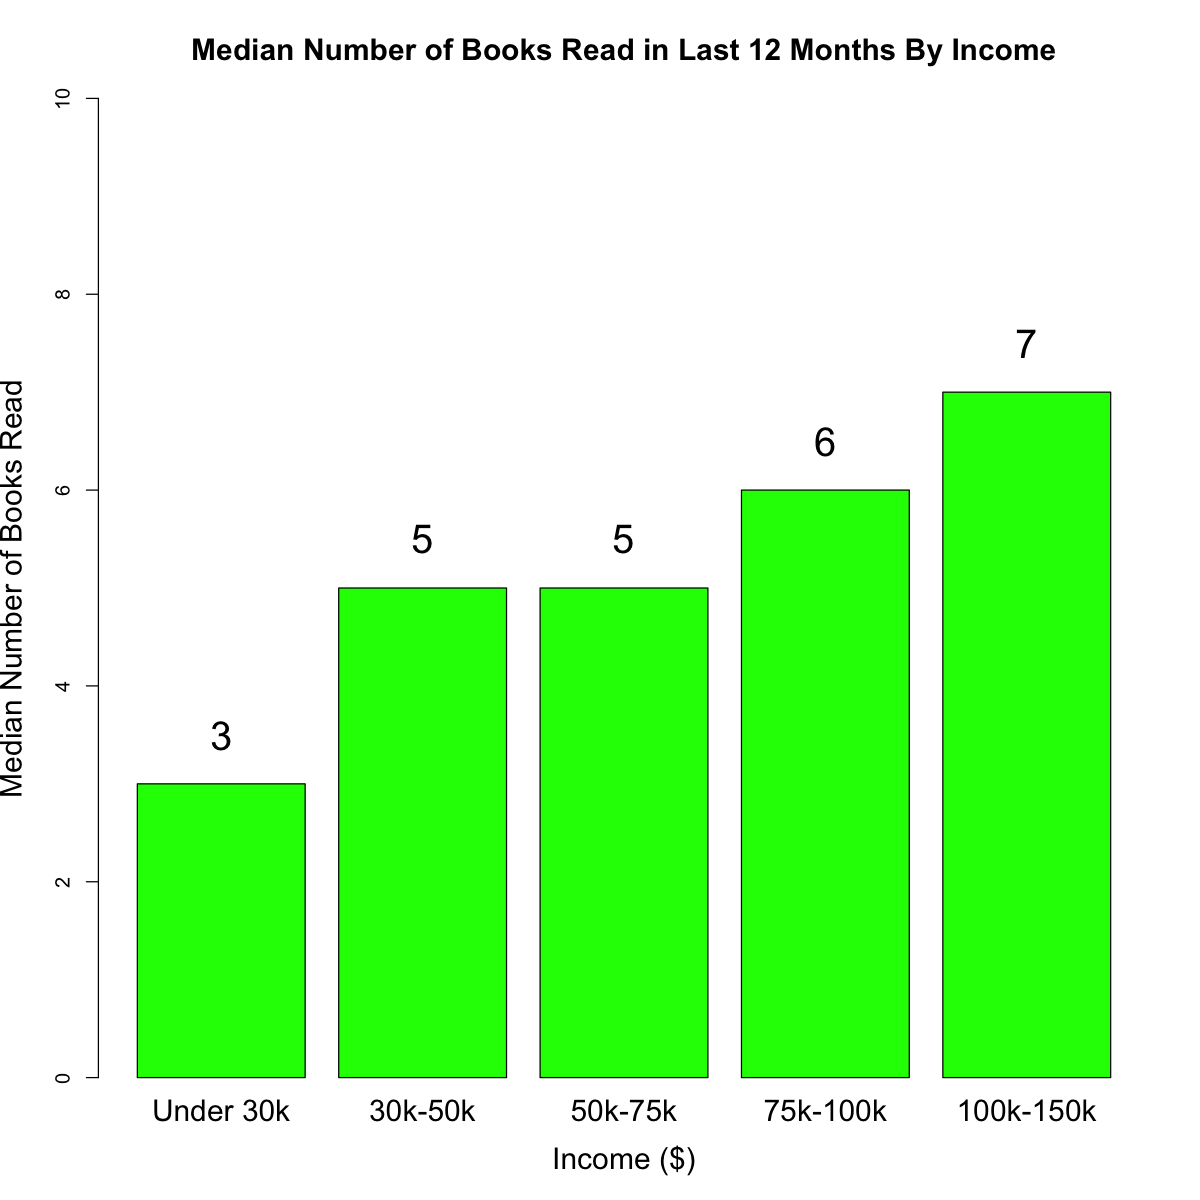

In [13]:
# plot
options(repr.plot.width=10, repr.plot.height=10)
bp<-barplot(medBooks, names.arg=incomes, ylim=c(0,10), 
            main="Median Number of Books Read in Last 12 Months By Income", 
            xlab="Income ($)", 
            ylab="Median Number of Books Read", 
            col = "green", cex.lab=1.5, cex.main=1.5, cex.names=1.5)
text(x=bp,
     y=incomeByBooks$medBooks+0.5,
     labels=round(incomeByBooks$medBooks,1),
     col="black", cex=2)
invisible(bp)

Based on the their medians, the ***Under 30k*** income group read noticably <u>*less*</u> books in the past year than the other groups with **3 books**, 2 less than the second lowest amount. 

The ***100k-150k*** group read the <u>*most</u>* books based on median with **7 books**, just 1 more than the ***75k-100k*** group.

### Books by Education Level
The same analysis will be performed but with the average number of books read being measured by each **`Education`** group. The **`Education`** category lists the highest attained level of education by each participant. The different groups include:
- **High school incomplete** (dropped out)
- **High school graduate**
- **Technical school** (technical, trade or vocational school AFTER high school)
- **Some college** (Some college, no 4-year degree)
- **College graduate**
- **Post grad** (Post-graduate training/professional school after college)





In [14]:
# Condense education group labels
df$Education[df$Education=="Technical, trade or vocational school AFTER high school"]<-"Technical School"
df$Education[df$Education=="Post-graduate training/professional school after college"]<-"Post Grad"
df$Education[df$Education=="Some college, no 4-year degree"]<-"Some college"
head(df)

,Incomes,NumBooksRead,Education
,<chr>,<int>,<chr>
1,50k-75k,30,Some college
2,100k-150k,30,Some college
3,75k-100k,30,Post Grad
4,100k-150k,30,Some college
5,Under 30k,30,College graduate
6,Under 30k,30,High school graduate


In [15]:
# get median books read per education level
eduPath<-unique(df$Education)
medBooks<-sapply(eduPath, function(x) median(df$NumBooksRead[df$Education==x]))
medBooks

Some college              Post Grad       College graduate 
                   5.0                   10.0                    6.0 
  High school graduate       Technical School High school incomplete 
                   4.0                    3.0                    1.5

In [16]:
booksByEdu<-data.frame(eduPath,medBooks)
rownames(booksByEdu) <- NULL
booksByEdu

eduPath,medBooks
<chr>,<dbl>
Some college,5.0
Post Grad,10.0
College graduate,6.0
High school graduate,4.0
Technical School,3.0
High school incomplete,1.5


In [17]:
# sort education levels by ascending med books read
sortMed<-order(booksByEdu$medBooks)
sortMed

[1] 6 5 4 1 3 2

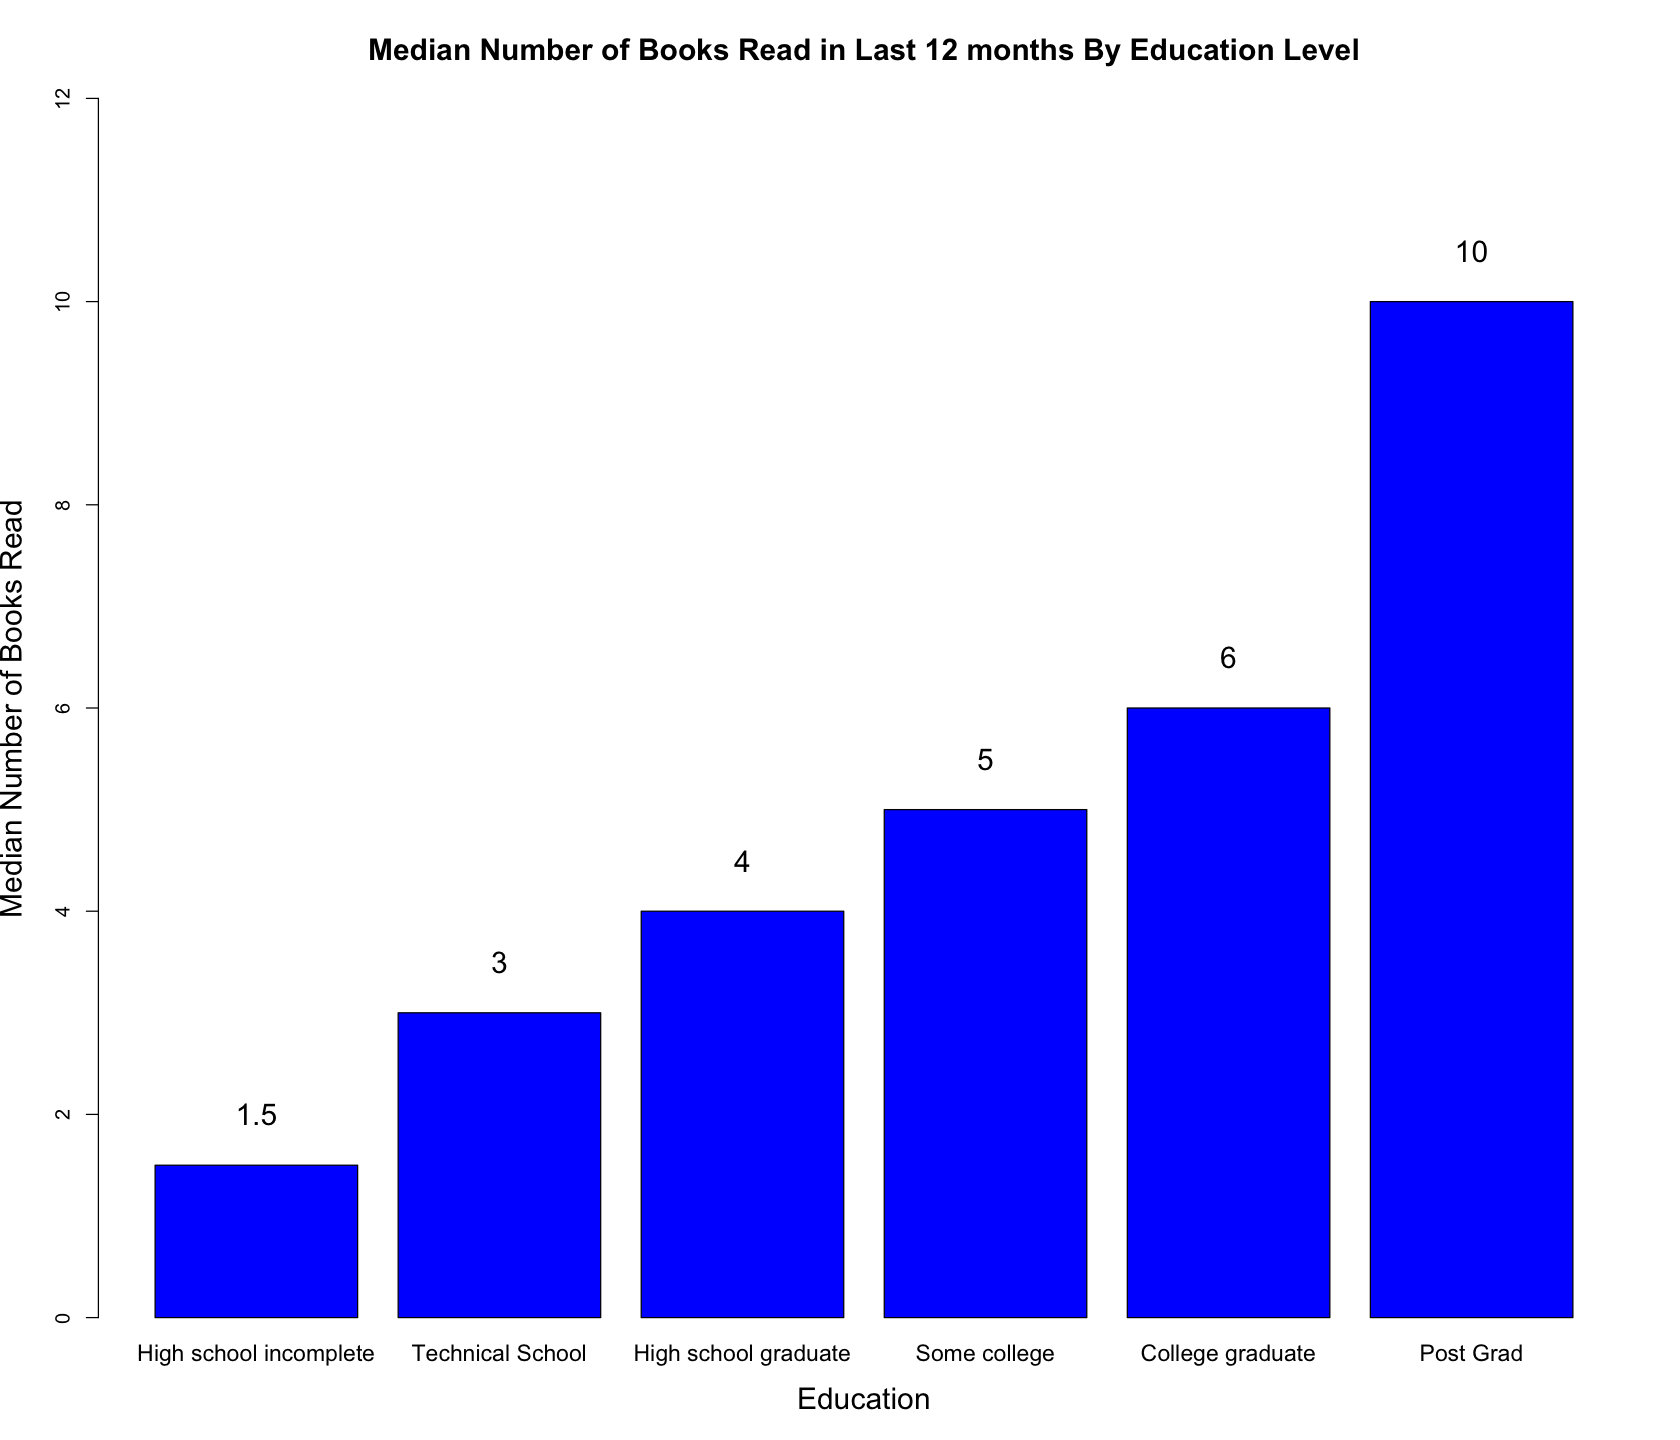

In [18]:
#plot
options(repr.plot.width=14, repr.plot.height=12)
bp<-barplot(booksByEdu$medBooks[sortMed],names.arg=booksByEdu$eduPath[sortMed],
            ylim=c(0,12),
            cex.names=1.15,
            xlab="Education",
            ylab="Median Number of Books Read", 
            main="Median Number of Books Read in Last 12 months By Education Level", 
            col="blue", cex.lab=1.5, cex.main=1.5)
text(x=bp,
     y=booksByEdu$medBooks[sortMed]+0.5,
     labels=round(booksByEdu$medBooks[sortMed],1),
     col="black", cex=1.5)
invisible(bp)

There is a distinguishable difference between the median number of books read by the ***High school incomplete*** group with **1.5 books** and the ***Post grad*** group, who read the most with **10 books** based on median.

This plot shows that the higher level of education the participants achieve, the more books they tend to read. Because of the filters performed on the dataset before the analysis, it is not likely that the higher education groups' number of books read includes books that were required readings for school, as the students were filtered out of the dataset. Therefore, these high median values are likely from books the participants read <u>*by choice*</u>.

## Income by Education Level
The final analysis will look at the proportions of income earned for each education level.

In [19]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.2.1     ✔ stringr 1.5.1
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [20]:
# resize plot window
options(repr.plot.width=10, repr.plot.height=10)

### High School Incomplete 

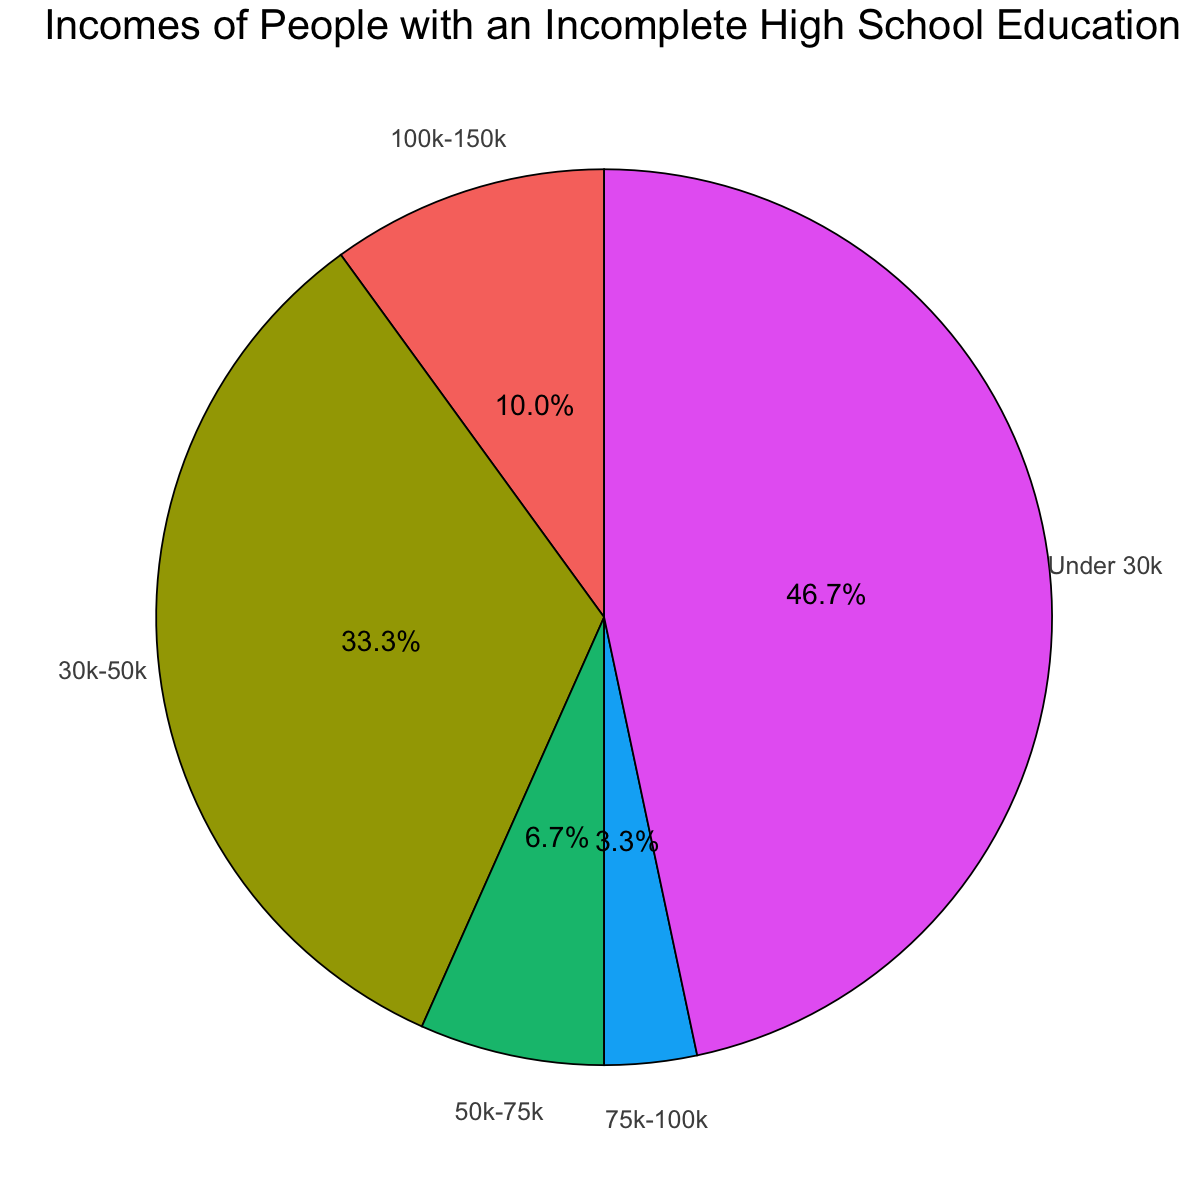

In [23]:
edu<-subset(df,Education=="High school incomplete")
inc<-plyr::count(edu,"Incomes") # counts of each education group

# percentages of education groups
pct<-inc$freq/sum(inc$freq)

# Get the positions
df2 <- inc %>% 
    mutate(csum = rev(cumsum(rev(pct))), 
        pos = pct/2 + lead(csum, 1),
        pos = if_else(is.na(pos), pct/2, pos))

ggplot(inc, aes(x = "", y = pct, fill = Incomes)) +
    geom_col(width = 1, color = 1) +
    geom_text(size=6, aes(label = scales::percent(pct)),
            position = position_stack(vjust = 0.5)) +
    labs(title = "Incomes of People with an Incomplete High School Education") +
    coord_polar(theta = "y") +
    guides(fill = guide_legend(title = "Incomes")) +
    scale_y_continuous(breaks = df2$pos, labels = inc$Incomes) +
    theme(axis.ticks = element_blank(),
        axis.title = element_blank(),
        axis.text = element_text(size = 15), 
        plot.title = element_text(size = 25),
        legend.position = "none",
        panel.background = element_rect(fill = "white"))

### High School Graduate

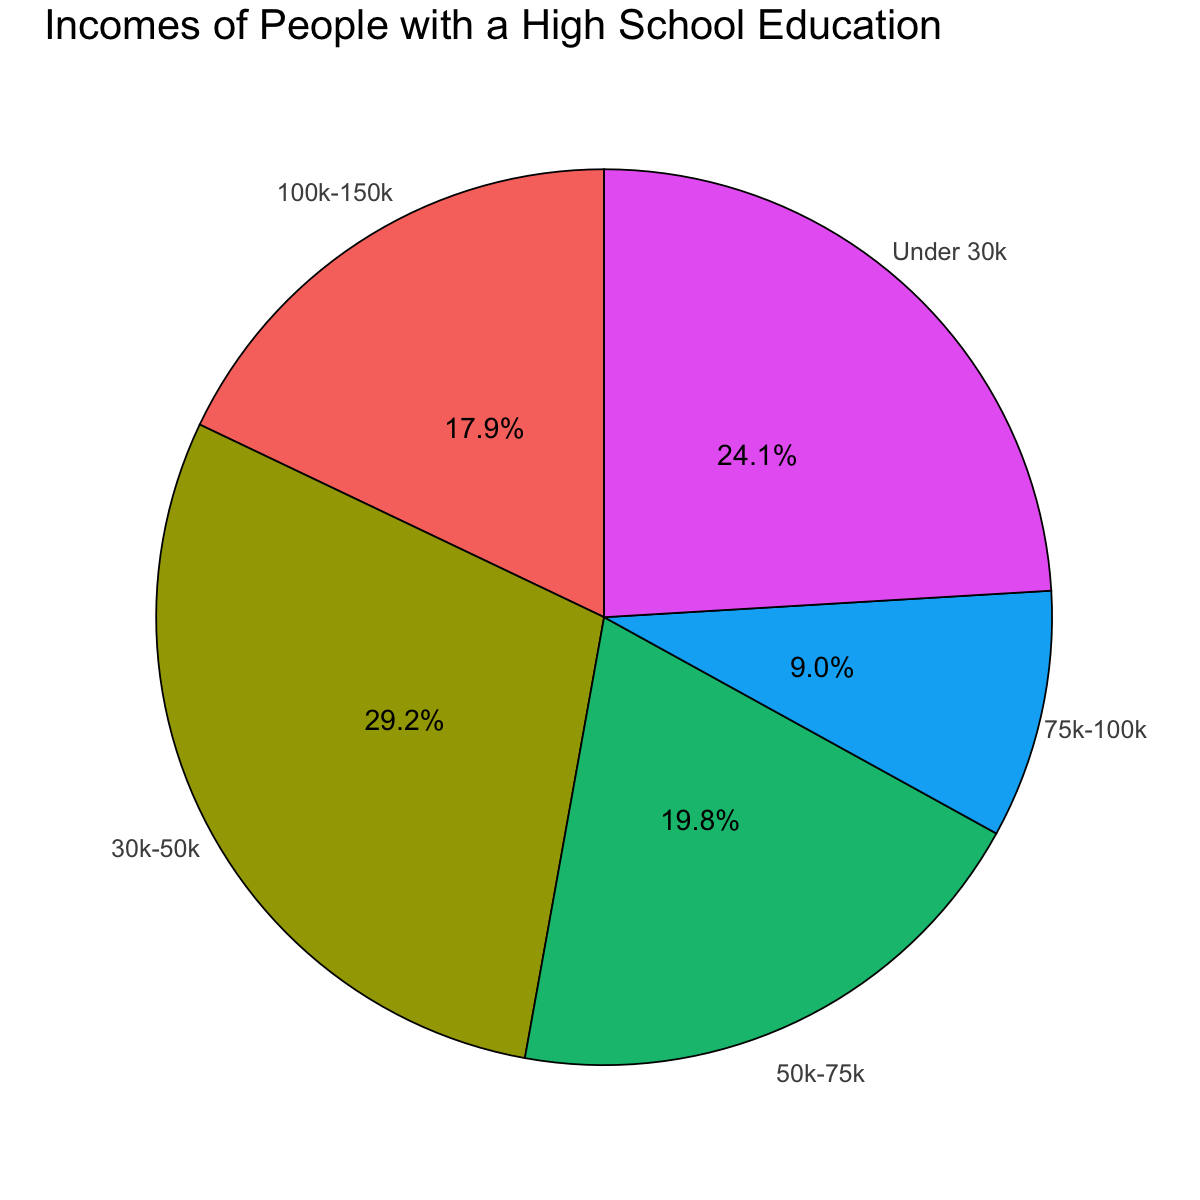

In [24]:
edu<-subset(df,Education=="High school graduate")
inc<-plyr::count(edu,"Incomes") # counts of each education group

# percentages of education groups
pct<-inc$freq/sum(inc$freq)

# Get the positions
df2 <- inc %>% 
    mutate(csum = rev(cumsum(rev(pct))), 
        pos = pct/2 + lead(csum, 1),
        pos = if_else(is.na(pos), pct/2, pos))

ggplot(inc, aes(x = "", y = pct, fill = Incomes)) +
    geom_col(width = 1, color = 1) +
    geom_text(size=6, aes(label = scales::percent(pct)),
            position = position_stack(vjust = 0.5)) +
    labs(title = "Incomes of People with a High School Education") +
    coord_polar(theta = "y") +
    guides(fill = guide_legend(title = "Incomes")) +
    scale_y_continuous(breaks = df2$pos, labels = inc$Incomes) +
    theme(axis.ticks = element_blank(),
        axis.title = element_blank(),
        axis.text = element_text(size = 15), 
        plot.title = element_text(size = 25),
        legend.position = "none",
        panel.background = element_rect(fill = "white"))

### Technical School

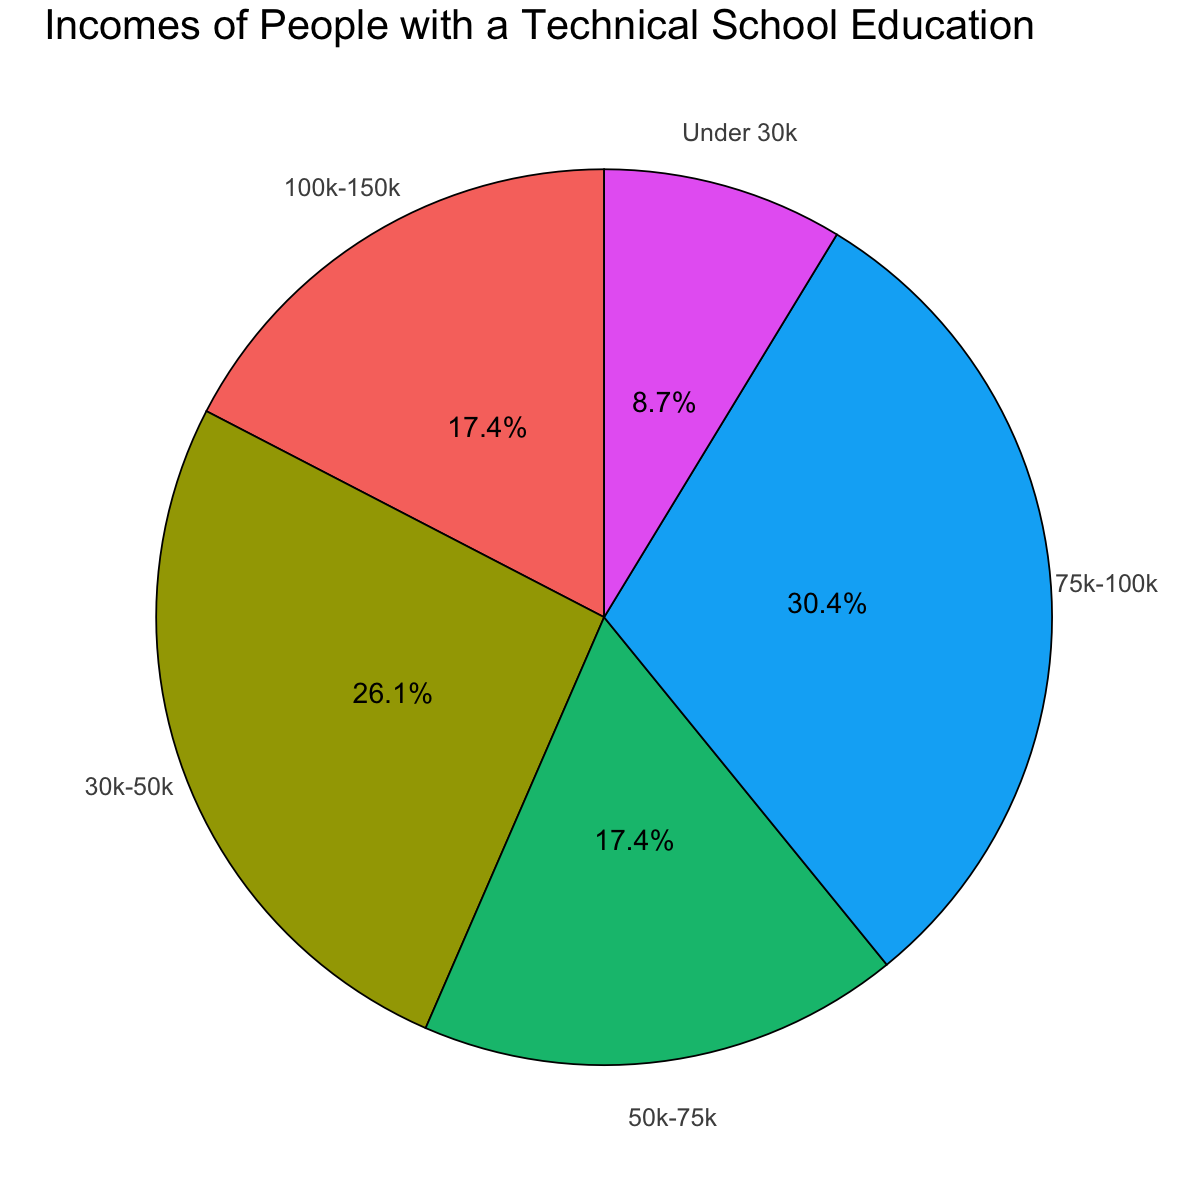

In [25]:
edu<-subset(df,Education=="Technical School")
inc<-plyr::count(edu,"Incomes") # counts of each education group

# percentages of education groups
pct<-inc$freq/sum(inc$freq)

# Get the positions
df2 <- inc %>% 
    mutate(csum = rev(cumsum(rev(pct))), 
        pos = pct/2 + lead(csum, 1),
        pos = if_else(is.na(pos), pct/2, pos))

ggplot(inc, aes(x = "", y = pct, fill = Incomes)) +
    geom_col(width = 1, color = 1) +
    geom_text(size=6, aes(label = scales::percent(pct)),
            position = position_stack(vjust = 0.5)) +
    labs(title = "Incomes of People with a Technical School Education") +
    coord_polar(theta = "y") +
    guides(fill = guide_legend(title = "Incomes")) +
    scale_y_continuous(breaks = df2$pos, labels = inc$Incomes) +
    theme(axis.ticks = element_blank(),
        axis.title = element_blank(),
        axis.text = element_text(size = 15), 
        plot.title = element_text(size = 25),
        legend.position = "none",
        panel.background = element_rect(fill = "white"))

### Some College

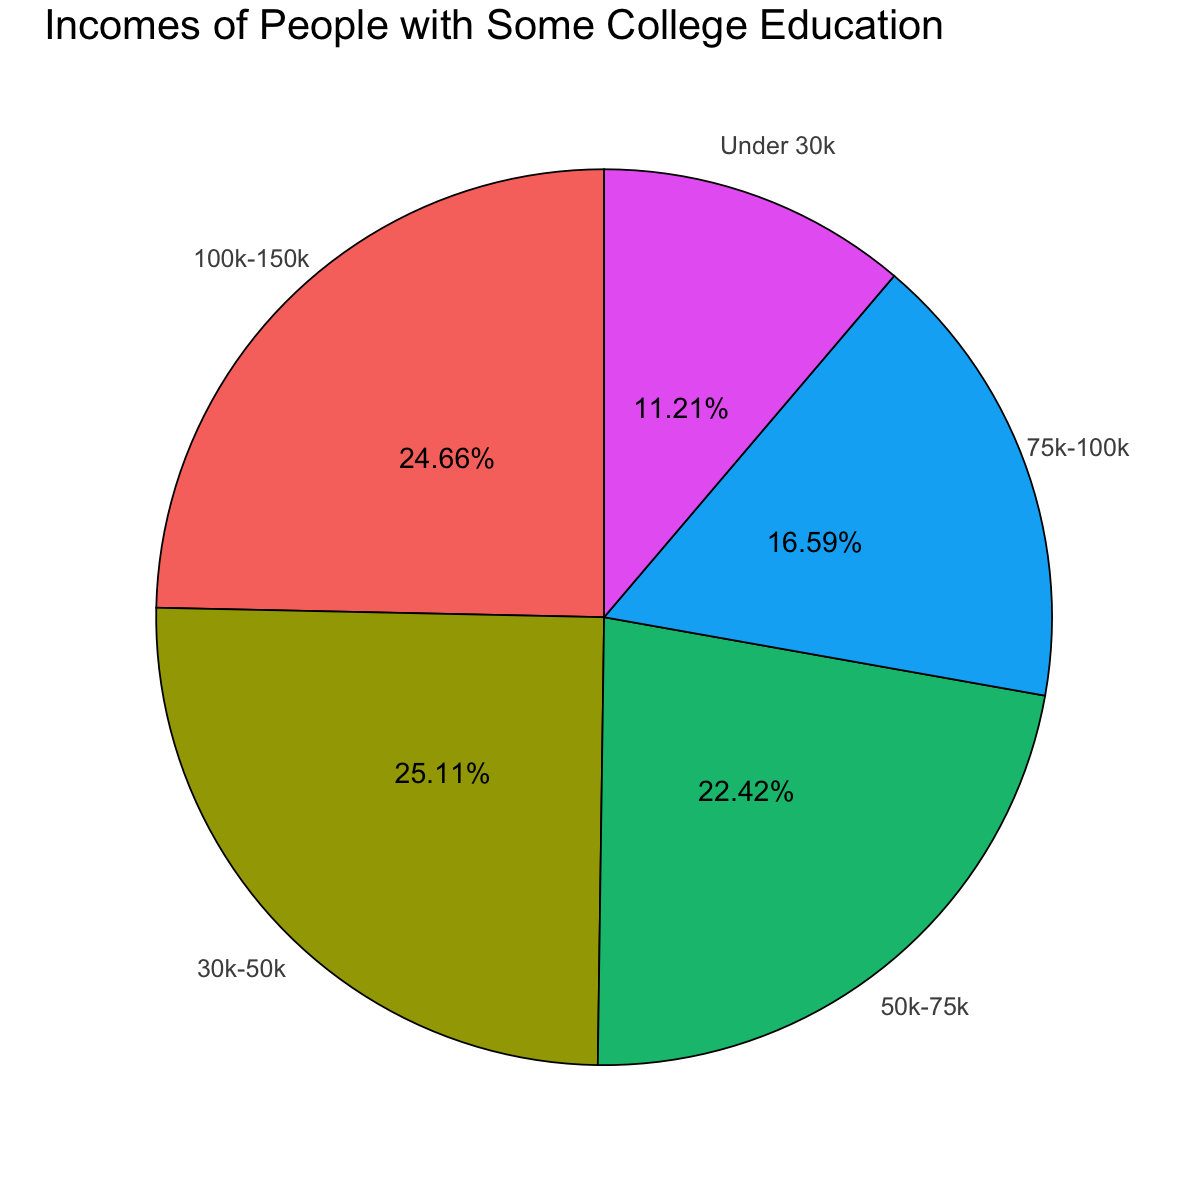

In [26]:
edu<-subset(df,Education=="Some college")
inc<-plyr::count(edu,"Incomes") # counts of each education group

# percentages of education groups
pct<-inc$freq/sum(inc$freq)

# Get the positions
df2 <- inc %>% 
    mutate(csum = rev(cumsum(rev(pct))), 
        pos = pct/2 + lead(csum, 1),
        pos = if_else(is.na(pos), pct/2, pos))

ggplot(inc, aes(x = "", y = pct, fill = Incomes)) +
    geom_col(width = 1, color = 1) +
    geom_text(size=6, aes(label = scales::percent(pct)),
            position = position_stack(vjust = 0.5)) +
    labs(title = "Incomes of People with Some College Education") +
    coord_polar(theta = "y") +
    guides(fill = guide_legend(title = "Incomes")) +
    scale_y_continuous(breaks = df2$pos, labels = inc$Incomes) +
    theme(axis.ticks = element_blank(),
        axis.title = element_blank(),
        axis.text = element_text(size = 15), 
        plot.title = element_text(size = 25),
        legend.position = "none",
        panel.background = element_rect(fill = "white"))

### College Graduate

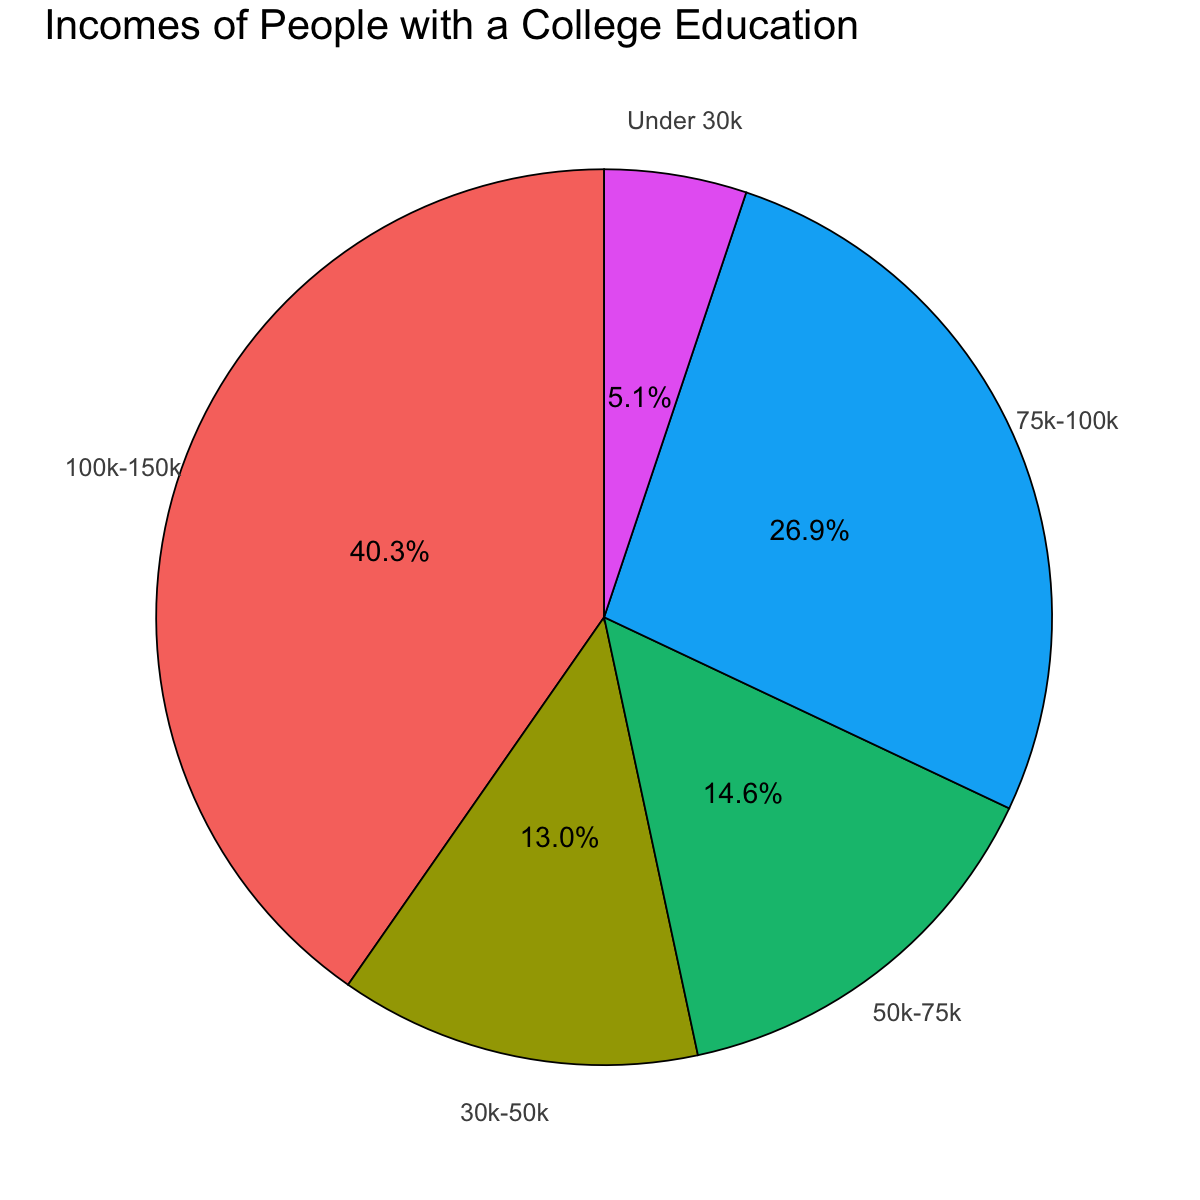

In [27]:
edu<-subset(df,Education=="College graduate")
inc<-plyr::count(edu,"Incomes") # counts of each education group

# percentages of education groups
pct<-inc$freq/sum(inc$freq)

# Get the positions
df2 <- inc %>% 
    mutate(csum = rev(cumsum(rev(pct))), 
        pos = pct/2 + lead(csum, 1),
        pos = if_else(is.na(pos), pct/2, pos))

ggplot(inc, aes(x = "", y = pct, fill = Incomes)) +
    geom_col(width = 1, color = 1) +
    geom_text(size=6, aes(label = scales::percent(pct)),
            position = position_stack(vjust = 0.5)) +
    labs(title = "Incomes of People with a College Education") +
    coord_polar(theta = "y") +
    guides(fill = guide_legend(title = "Incomes")) +
    scale_y_continuous(breaks = df2$pos, labels = inc$Incomes) +
    theme(axis.ticks = element_blank(),
        axis.title = element_blank(),
        axis.text = element_text(size = 15), 
        plot.title = element_text(size = 25),
        legend.position = "none",
        panel.background = element_rect(fill = "white"))

### Post Grad

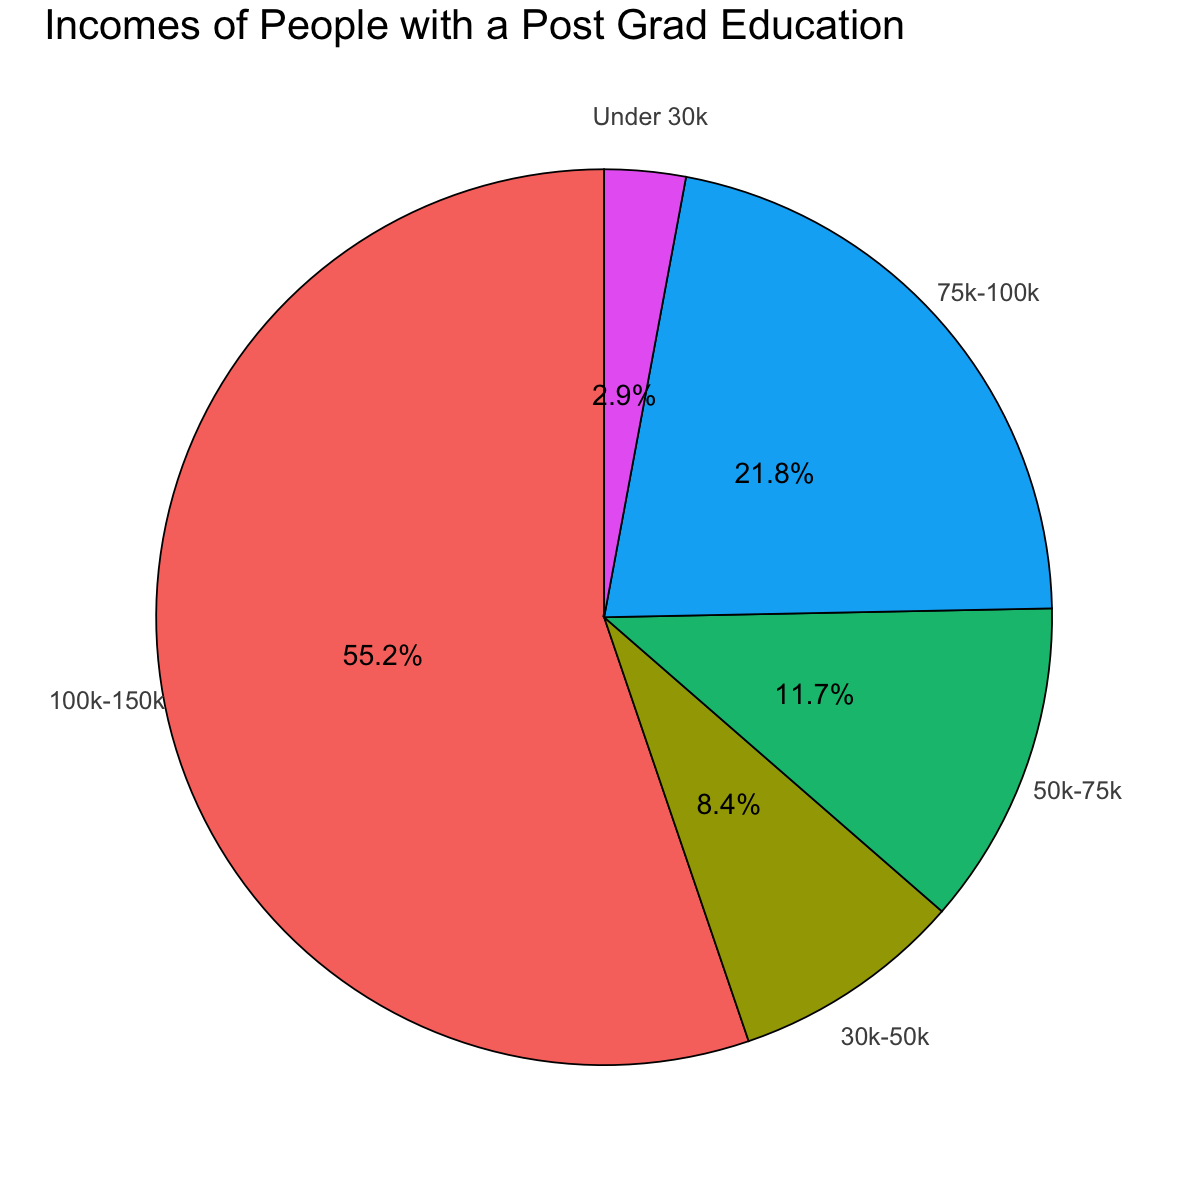

In [28]:
edu<-subset(df,Education=="Post Grad")
inc<-plyr::count(edu,"Incomes") # counts of each education group

# percentages of education groups
pct<-inc$freq/sum(inc$freq)

# Get the positions
df2 <- inc %>% 
    mutate(csum = rev(cumsum(rev(pct))), 
        pos = pct/2 + lead(csum, 1),
        pos = if_else(is.na(pos), pct/2, pos))

ggplot(inc, aes(x = "", y = pct, fill = Incomes)) +
    geom_col(width = 1, color = 1) +
    geom_text(size=6, aes(label = scales::percent(pct)),
            position = position_stack(vjust = 0.5)) +
    labs(title = "Incomes of People with a Post Grad Education") +
    coord_polar(theta = "y") +
    guides(fill = guide_legend(title = "Incomes")) +
    scale_y_continuous(breaks = df2$pos, labels = inc$Incomes) +
    theme(axis.ticks = element_blank(),
        axis.title = element_blank(),
        axis.text = element_text(size = 15), 
        plot.title = element_text(size = 25),
        legend.position = "none",
        panel.background = element_rect(fill = "white"))

Looking at the pie charts, **80%** of the ***High school incomplete*** group made 50k and less, with **46.7%** making <u>**under 30k**</u>.

Compared to the ***Post grad*** group, those making <u>**under 30k**</u> only accounted for ***2.9%*** of the group, while those making 75k and up account for **77%** of participants with post graduate education, with **55.2%** making <u>**100k-150k**</u>, the highest of any group.

## Conclusions

Referring to my original hypothesis, I was correct in that those who read more books earned more but with an indirect correlation. The first analysis that compared the **median books read by the different income groups** showed that the number of books read from the ***under 30k*** group was <u>4 books less</u> than the ***100k-150k*** group. When comparing the **median number of books read by education levels**, the ***High school incomplete*** group read <u>8.5 less</u> books by median than the ***Post grad*** group, who read at least 4 books more than any other group. Lastly, when comparing the **proportions of the participants' income in each education level**, <u>55.2%</u> of ***Post grad*** group made ***100k-150k*** while nearly half of the ***High school incomplete*** group earned ***under 30k*** at <u>46.7%</u>.

These analyses show that reading can lead to a higher level of education. With a higher level of education, you would likely earn a higher income than lower levels. Therefore, to answer the questions stated at the beginning sections, reading does not directly mean an individual will earn more money. How it relates to income is the relationship between reading more books and reaching higher levels of education, which is likely to earn a higher income in the job market. For the question that asks if the amount that someone reads is an indicator of how much they make, the answer is no. The amount that someone reads is likely an indicator of how much they like to learn. How much they like to learn would indicate how far they would pursue their education which would eventually lead to a higher income. I would like to point out that a higher level education is not for everyone. Some people are more skilled in careers that work with their hands and better suit their interests. However, gaining knowledge is not restricted to higher level education and can be applied everywhere. There are a large variety of subjects that have books written about them. Becoming knowledgeable about a subject, no matter what it is, is a skill that is sought out by jobs and will eventually lead to a higher income. Books fill a mind with knowledge. With that being said, my suggestion is to read more books regardless of what career you want to pursue and gain as much knowledge as you can.

## Works Cited

Simmons, M. (2021, December 3). Bill Gates, Warren Buffett and Oprah all use the 5-hour rule. Medium. Retrieved 
December 21, 2022, from https://medium.com/accelerated-intelligence/bill-gates-warren-buffett-and-oprah-all-use-the-5-hour-rule-308f528b6363#:~:text=Warren%20Buffett%20spends%20five%20to,one%20book%20every%20two%20weeks.

**The dataset used in this analysis can be found here:**
https://www.kaggle.com/datasets/vipulgote4/reading-habit-dataset?datasetId=856212&sortBy=dateRun&tab=bookmarked